# Estadistica Aplicada

Sesion 10, 06 de septiembre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [1]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [3]:
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [4]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [5]:
exponen = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [6]:
exponen.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Funcion de riesgo de la exponencial')

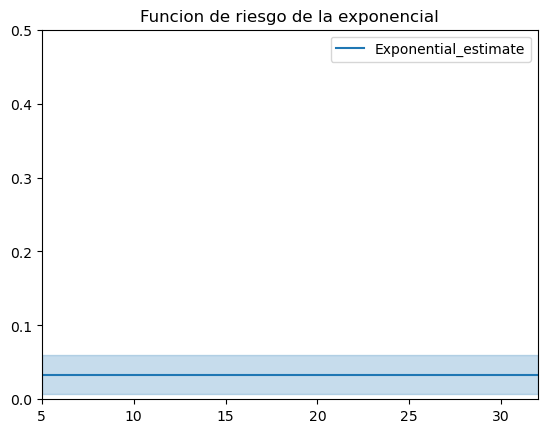

In [7]:
exponen.plot_hazard();
plt.xlim(5,32)
plt.ylim(0,.5)
plt.title('Funcion de riesgo de la exponencial')

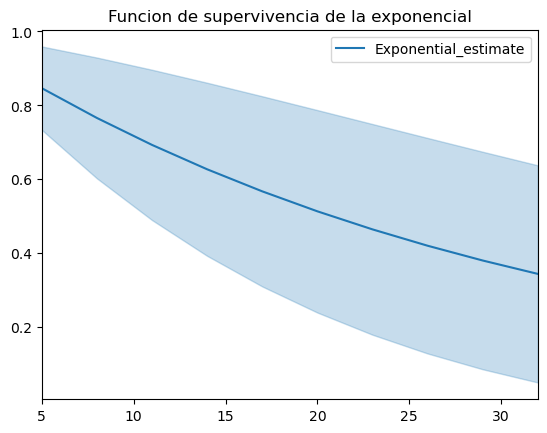

In [8]:
exponen.plot_survival_function()
plt.title('Funcion de supervivencia de la exponencial')
plt.xlim(5,32);

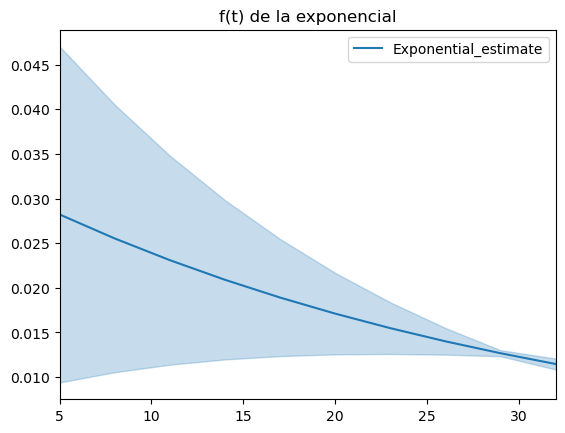

In [9]:
exponen.plot_density()
plt.title('f(t) de la exponencial')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max());

# Weibull

In [10]:
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [11]:
## gamma de weibull
mweibull.rho_

1.8867259500116444

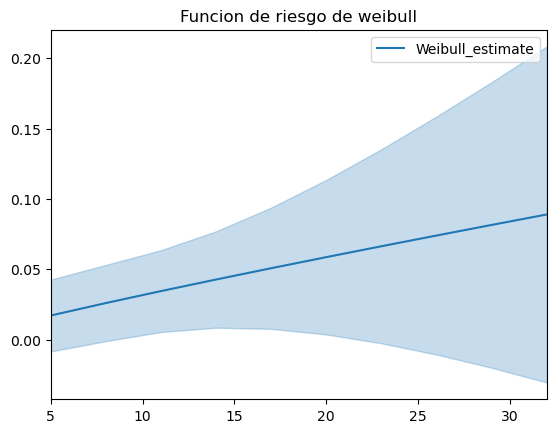

In [12]:
## h(t)
mweibull.plot_hazard()
plt.title('Funcion de riesgo de weibull')
plt.xlim(5,32);

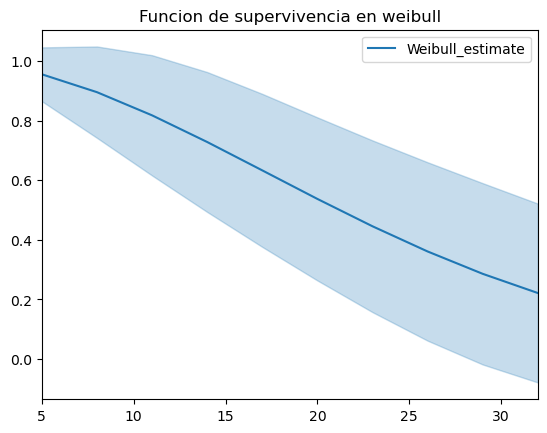

In [13]:
## s(t)
mweibull.plot_survival_function()
plt.title('Funcion de supervivencia en weibull')
plt.xlim(5,32);

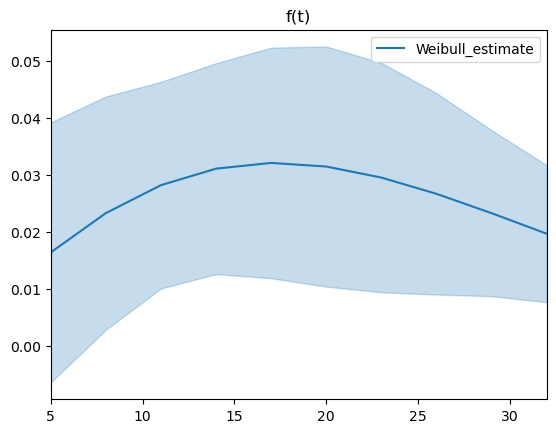

In [14]:
## f(t)
mweibull.plot_density()
plt.title('f(t)')
plt.xlim(5,32);

# Log Normal
Suponiendo que el log tiempo de supervivencia se distribuye normal

In [15]:
mlogn = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

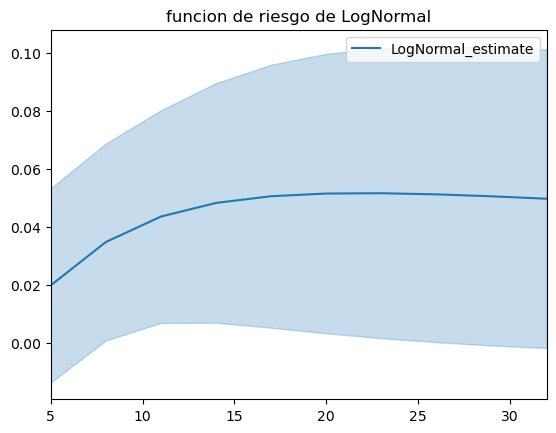

In [18]:
# riesgo
mlogn.plot_hazard()
plt.title('funcion de riesgo de LogNormal')
plt.xlim(5, 32);

In [19]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850
